### データの準備

In [1]:
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

df = sns.load_dataset("tips")
df["tip_rate"] = df["tip"] / df["total_bill"]
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## 分布(distrobution)
- 一つの連続変数を可視化したい場合はヒストグラム
- カテゴリ変数を扱う場合は棒グラフを使う

### 分布の描画

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip'>

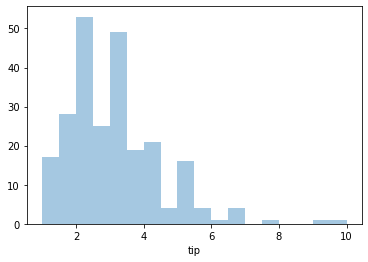

In [2]:
sns.distplot(df["tip"], kde=False)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


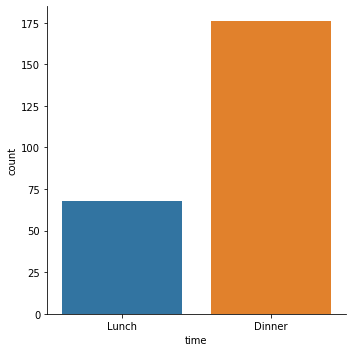

In [3]:
sns.catplot("time", data=df, kind="count")

## 記述統計と推測統計
- 記述統計: データの特徴を記述する(平均値、中央値)
- 推測統計:
標本から母集団を推測する

# 代表値(mean)
平均値、中央値、最頻値など、データの性質を表す値のこと。
## 平均値  
通常、標本の平均を$\bar{x}$、母集団の平均をμで表す  
 **偏差(deviation)**  : 平均からの差の値のこと。　偏差の合計は0となる
 平均値は各地からの差(偏差)の2条の合計(平方和)を最小にする

In [4]:
np.mean(df["tip_rate"])

df["tip_rate"].mean()

0.16080258172250478

<AxesSubplot:xlabel='sex'>

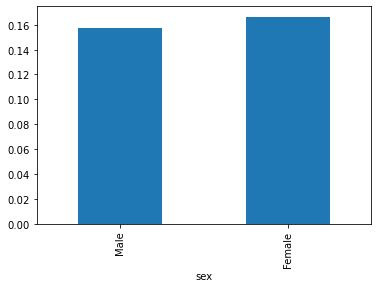

In [5]:
sex_grouped_df = df.groupby("sex").mean()
# seabornを用いなくても、dateframeのメソッドとして、plotが用意されている
sex_grouped_df["tip_rate"].plot(kind="bar")

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

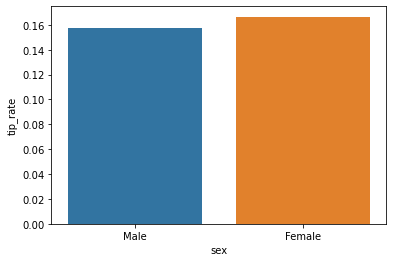

In [6]:
sns.barplot(x="sex", y="tip_rate", data=df, ci=None)

## 中央値(median)
平均値より外れ値の影響を受けにくい  
年収の計算など、数値に上限がない値を扱う際は中央値の方が代表値として優れていると言える  
平均値の計算より時間がかかることに注意(一度データをソートする必要があるから)  

In [7]:
np.median(df["tip_rate"])
df["tip_rate"].median()

0.15476977125802577

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip_rate'>

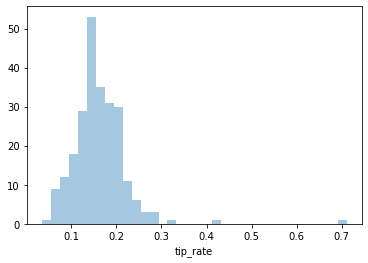

In [8]:
# 以下に示した分布の0.7付近にある外れ値が平均値に大きく影響しているので、その影響が出にくい中央値では、平均値より低い値を取ることが予想される
sns.distplot(df["tip_rate"], kde=False)

In [9]:
df.groupby("sex").median()

,total_bill,tip,size,tip_rate
sex,,,,
Male,18.35,3.00,2.0,0.153492
Female,16.40,2.75,2.0,0.155581


<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

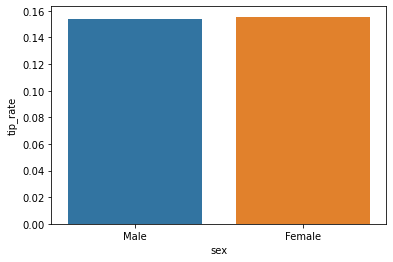

In [10]:
sns.barplot(x="sex", y="tip_rate", data=df, estimator=np.median, ci=None)

In [11]:
df.sort_values("tip_rate", ascending=False)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
...,...,...,...,...,...,...,...,...
187,30.46,2.00,Male,Yes,Sun,Dinner,5,0.065660
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
57,26.41,1.50,Female,No,Sat,Dinner,2,0.056797
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433


## 最頻値(mode)
データの中で最も多く観測される値(最も頻繁)  
極端に特定の値にデータが集中している場合などに有効だが、平均値や中央値に比べると出番が少ない。  
分布のテッペンに位置するのが最頻値である => 山の分布の一番盛り上がっている部分をmodeに由来して、**モーダル(modal)**と呼ぶ   

In [12]:
mode, count = stats.mode(df)
# 多次元の値にも対応するため、mode, countはそれぞれ配列で返ってくる
print(mode)
print(count)

[[13.42 2.0 'Male' 'No' 'Sat' 'Dinner' 2 0.1448225923244026]]
[[  3  33 157 151  87 176 156   2]]


# 散布度
代表値だけではデータの本質は伝えられない。データがどれだけバラついているのかを示す以下の散布度を考慮することもとても重要である。  
範囲、四分位数範囲、平均偏差、分散、標準偏差などが散布度に該当する

## 範囲(range)
データの範囲。最小値~最大値  
外れ値に弱い。全体のばらつき度を示すには不十分

In [13]:
# 最小値
np.min(df["tip"])
df["tip"].min()

1.0

In [14]:
df.groupby('sex').min()

/tmp/ipykernel_12/2971066712.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  df.groupby('sex').min()


,total_bill,tip,size,tip_rate
sex,,,,
Male,7.25,1.0,1,0.035638
Female,3.07,1.0,1,0.056433


In [15]:
# 最大値
np.max(df["tip"])
df["tip"].max()

10.0

In [16]:
df.groupby('sex').max()

/tmp/ipykernel_12/1120366919.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df.groupby('sex').max()


,total_bill,tip,size,tip_rate
sex,,,,
Male,50.81,10.0,6,0.710345
Female,44.30,6.5,6,0.416667


In [17]:
# 範囲
df["tip"].max() - df["tip"].min()

9.0

## 四分位数
データを並べて四分割した時の、25%(第一四分位数), 50%(第二四分位数 = 中央値), 75%の値(第三四分位数)。  
範囲よりは外れ値に強い。  
全体のばらつきを示すにはまだ不十分　 
※四分位数自体は代表値の一つ  
quantile: 分位数　という意味。この単語だけでは、任意の場所で区切った場合の分位数という意味しか持たないことに注意。(四分位数に限定される訳ではない)
### IQR interquartile range 四分位範囲
$ Q_3 - Q_1 $
### QD Quartile deviation 四分位偏差
$ \frac{Q_3 - Q_1}{2} $

In [18]:
# 四分位数
np.quantile(df["tip_rate"], [0.25, 0.5, 0.75])
df["tip_rate"].quantile([0.25, 0.5, 0.75])

0.25    0.129127
0.50    0.154770
0.75    0.191475
Name: tip_rate, dtype: float64

In [19]:
# 四分位範囲(IQR)
stats.iqr(df["tip_rate"])
# 四分位偏差(QD)
stats.iqr(df["tip_rate"]) / 2

0.031174062293445756

### box plot(箱ひげ図)
四分位数を使ったグラフ

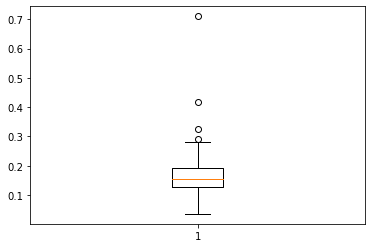

In [20]:
plt.boxplot(df["tip_rate"])
plt.show()

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

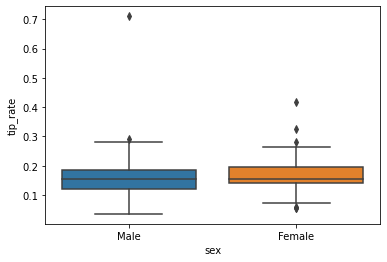

In [21]:
sns.boxplot(x="sex", y="tip_rate", data=df)

## 平均偏差　(MD: mean deviation)
平均(もしくは中央値)からの偏差の絶対値の平均  
全てのデータを使うので、範囲や四分位数より散布図としては適している  
絶対値が扱いにくという点が弱点。 => 絶対値にするのがめんどいので、差の二乗を使うようになったのが**分散**
$$ MD = \frac{1}{n}(|x_1 - \bar{x}| + |x_2 - \bar{x}| + ... + |x_n - \bar{x}|) = \frac{1}{n}\sum_{i=1}^n|x_i - \bar{x}| $$

## 分散 (Variance)
平均からの偏差の2乗の平均  
全てのデータを使うので、範囲や四分位数より散布度としては適している  
**標本の分散は$s^2$、母集団の分散は$\sigma^2$と表すことが多い**　  
n ではなく n-1 でわる**不偏分散**もよく使われる  
2乗するため、尺度がずれてしまうのが問題  => その平方根を使うようになったのが**標準偏差**

$$ s^2 = \frac{1}{n}((x_1 - \bar{x})^2 + (x_2 - \bar{x})^2 + ... + (x_n - \bar{x})^2) = \frac{1}{n}\sum_{i=1}^n(x_i - \bar{x})^2 $$

## 標準偏差
平均からの偏差の2乗の平均の平方根(分散の平方根)  
全てのデータを使うので、範囲や四分位数より散布度としては適している  
**標本の標準偏差は$s$、母集団の標準偏差は$\sigma$と表すことが多い**　  

$$ s = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \bar{x})^2} $$



### ※標準偏差を扱うようになった経緯
- $ \frac{1}{n}\sum_{i=1}^n(x_i - \bar{x}) $ だと0になってしまう(差の平均)
- 絶対値だと扱いにくい(平均偏差)
- 二乗だと尺度が変わってしまう(分散)  
=> 標準偏差を使おう！！

In [24]:
# 分散　(不偏分散ではない)
np.var(df["tip"])

1.9066085124966428

In [29]:
# 標準偏差
std = np.std(df["tip"])
std**2

1.9066085124966425

## 分散や標準偏差の解釈
- 分散や標準偏差がわかると、データの散らばり具合がなんとなくわかる。
- 平均 ±s にどれくらいのデータが入っているかを考える。データが従う分布によって以下の表の正確度は変わるので注意。例えば、正規分布に従う場合は、概ね正しい  

|||
---|---
$\bar{x} \pm s$|約66%
$\bar{x} \pm 3s$|約95%
$\bar{x} \pm 3s$|約99% = 100%


In [31]:
li = [2,3,4,5,6,7]
li[1] = 1
print(li)

[2, 1, 4, 5, 6, 7]
